# Análise Turbina Eólica
Fonte:Kaggle https://www.kaggle.com/datasets/berkerisen/wind-turbine-scada-dataset?resource=download

## Sobre o conjunto de dados
### Contexto
Em turbinas eólicas, a Scada Systems mede e salva dados como velocidade do vento, direção do vento, energia gerada etc. por intervalos de 10 minutos. Este arquivo foi retirado do sistema scada de uma turbina eólica que está funcionando e gerando energia na Turquia.
### Conteúdo
Os dados no arquivo são:

*Data / hora ( para intervalos de 10 minutos )

*LV ActivePower ( kW ): A energia gerada pela turbina naquele momento

*Velocidade do vento ( m / s ): a velocidade do vento na altura do cubo da turbina ( a velocidade do vento que a turbina usa para geração de eletricidade )

*Teórico_Power_Curve ( KWh ): Os valores teóricos de potência que a turbina gera com a velocidade do vento fornecida pelo fabricante da turbina

*Direção do vento ( ° ): A direção do vento na altura do cubo das turbinas eólicas ( gira para essa direção automaticamente )

In [36]:
# impotando bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


### Lendo Arquivo csv

In [26]:
turbina = pd.read_csv('T1.csv')
turbina.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


### Alterando o nome das colunas

In [37]:
# alterando o nome das colunas da arquivo T1.csv
turbina.columns = ['Data/hora' , 'ActivePower(kw)', 'WindSpeed(m/s)' , 'Curva_Teórica(kw/h)', 'Direção do Vento(º)']
del turbina['Direção do Vento(º)'] # removendo a coluna Direção do Vento
turbina['Data/hora'] = pd.to_datetime(turbina['Data/hora'])
display(turbina)

,Data/hora,ActivePower(kw),WindSpeed(m/s),Curva_Teórica(kw/h)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972
...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503


### Imprimindo o gráfico - Real

<Axes: xlabel='WindSpeed(m/s)', ylabel='ActivePower(kw)'>

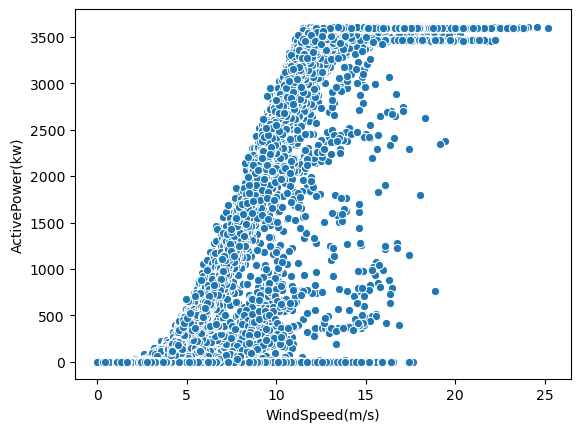

In [38]:
sns.scatterplot(data=turbina, x = 'WindSpeed(m/s)', y = 'ActivePower(kw)')

### Imprimindo o gráfico - Teórico

<Axes: xlabel='WindSpeed(m/s)', ylabel='Curva_Teórica(kw/h)'>

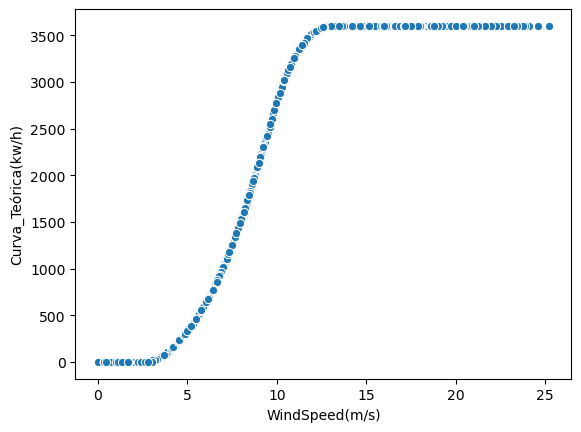

In [28]:
sns.scatterplot(data=turbina, x = 'WindSpeed(m/s)', y = 'Curva_Teórica(kw/h)')

### Criando " Limites Aceitáveis"

In [57]:
pot_real = turbina['ActivePower(kw)'].tolist()
pot_teorica = turbina['Curva_Teórica(kw/h)'].tolist()

# print(pot_real[0:15])

# cria uma lista com base na lista Curva_Teórica(kw/h) com acrescimo de 5%  na max e -5% na min

pot_max = []
pot_min = []
dentro_limite = []

for potencia in pot_teorica:
    pot_max.append(potencia * 1.05) # +5%
    pot_min.append(potencia * 0.95) # -5%
    
# print(pot_max, pot_min)    
    
# # teste se todas as listas tem o mesmos tamanho
# # print(len(pot_max), len(pot_min), len(pot_teorica))
# # saída 
# # 50530 50530 50530

for p, potencia in enumerate(pot_real):
    if potencia>= pot_min[p] and potencia<=pot_max[p]:
        dentro_limite.append('Dentro')
    elif potencia == 0:
        dentro_limite.append('Zero')
    else:
        dentro_limite.append('Fora')

# # para saber o percentual
print(dentro_limite.count('Dentro')/len(dentro_limite))
0.37286760340391845 = 37,2%

0.37286760340391845


### Adicionando lista "dentro_limite" ao DataFrame

In [67]:
turbina['DentroLimite'] = dentro_limite
display(turbina)

,Data/hora,ActivePower(kw),WindSpeed(m/s),Curva_Teórica(kw/h),DentroLimite
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,Fora
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,Fora
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,Fora
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,Fora
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,Fora
...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,Fora
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,Fora
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,Fora
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,Dentro


### Imprimindo o gráfico

<Axes: xlabel='WindSpeed(m/s)', ylabel='ActivePower(kw)'>

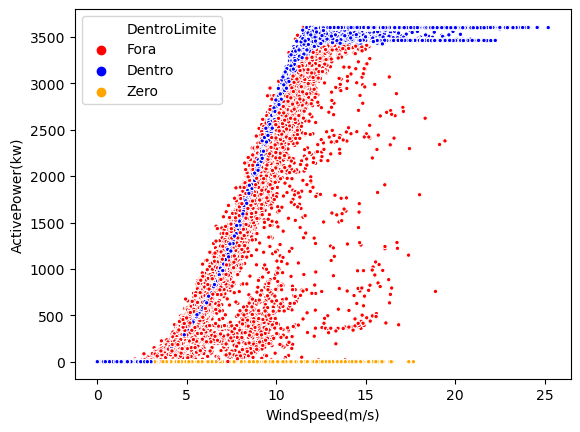

In [78]:
cores = {'Dentro':'blue','Fora':'red','Zero':'orange'}
sns.scatterplot(data=turbina, x= 'WindSpeed(m/s)', y= 'ActivePower(kw)', hue='DentroLimite', s=10, palette=cores)